# Analyzing Categorical Data 

In this project, we'll be working with categorical data and will be using a subset of data from the following data set: (https://www.kaggle.com/datasets/norc/general-social-survey?select=gss.csv).

After cleaning the data, we will use some visualizations tools. We also had used statsmodels for a special type of categorical plot.

In [34]:
# Import packages
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic

# Read in csv as a DataFrame and preview it
df = pd.read_csv("/Users/antoniogondim/Downloads/gss_sub.csv")
df

,year,id,labor_status,self_employed,marital_status,n_siblings,age,high_school,degree,political_affiliation,environment,law_enforcement,drugs,space_exploration,inequality,household_size
0,1972.0,1.0,WORKING FULLTIME,SOMEONE ELSE,NEVER MARRIED,3.0,23.0,16.0,BACHELOR,"IND,NEAR DEM",IAP,IAP,IAP,IAP,NaN,1.0
1,1972.0,2.0,RETIRED,SOMEONE ELSE,MARRIED,4.0,70.0,10.0,LT HIGH SCHOOL,NOT STR DEMOCRAT,IAP,IAP,IAP,IAP,NaN,2.0
2,1972.0,3.0,WORKING PARTTIME,SOMEONE ELSE,MARRIED,5.0,48.0,12.0,HIGH SCHOOL,INDEPENDENT,IAP,IAP,IAP,IAP,NaN,4.0
3,1972.0,4.0,WORKING FULLTIME,SOMEONE ELSE,MARRIED,5.0,27.0,17.0,BACHELOR,NOT STR DEMOCRAT,IAP,IAP,IAP,IAP,NaN,2.0
4,1972.0,5.0,KEEPING HOUSE,SOMEONE ELSE,MARRIED,2.0,61.0,12.0,HIGH SCHOOL,STRONG DEMOCRAT,IAP,IAP,IAP,IAP,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59594,2014.0,2539.0,KEEPING HOUSE,SOMEONE ELSE,WIDOWED,6.0,89.0,14.0,JUNIOR COLLEGE,NOT STR REPUBLICAN,TOO LITTLE,TOO LITTLE,TOO LITTLE,IAP,NaN,1.0
59595,2014.0,2540.0,WORKING FULLTIME,SOMEONE ELSE,DIVORCED,3.0,56.0,12.0,HIGH SCHOOL,INDEPENDENT,TOO LITTLE,TOO LITTLE,TOO MUCH,IAP,NaN,1.0
59596,2014.0,2541.0,WORKING FULLTIME,SOMEONE ELSE,NEVER MARRIED,5.0,24.0,14.0,HIGH SCHOOL,"IND,NEAR DEM",TOO LITTLE,ABOUT RIGHT,ABOUT RIGHT,IAP,NaN,3.0
59597,2014.0,2542.0,WORKING FULLTIME,SOMEONE ELSE,NEVER MARRIED,2.0,27.0,13.0,HIGH SCHOOL,NOT STR DEMOCRAT,IAP,IAP,IAP,IAP,NaN,2.0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59599 entries, 0 to 59598
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   59599 non-null  float64
 1   id                     59599 non-null  float64
 2   labor_status           59583 non-null  object 
 3   self_employed          59306 non-null  object 
 4   marital_status         59575 non-null  object 
 5   n_siblings             56682 non-null  float64
 6   age                    59599 non-null  float64
 7   high_school            59440 non-null  float64
 8   degree                 59464 non-null  object 
 9   political_affiliation  59257 non-null  object 
 10  environment            59388 non-null  object 
 11  law_enforcement        59378 non-null  object 
 12  drugs                  59380 non-null  object 
 13  space_exploration      59596 non-null  object 
 14  inequality             1532 non-null   float64
 15  ho

In [36]:

df=df.drop('inequality', axis=1)
#Too many null values

    

In [37]:
df=df.dropna()
df.shape

(55570, 15)

Above we see that our DataFrame contains `float64` column (numerical data), as well as a number of `object` columns, i.e object data types contain strings.

df.describe() method with the `include` parameter to select a particular DataType (in this case `"O"`). This returns the count, number of unique values, the mode, and frequency of the mode for each column having object as data type.

In [38]:
df.describe(include="O")

,labor_status,self_employed,marital_status,degree,political_affiliation,environment,law_enforcement,drugs,space_exploration
count,55570,55570,55570,55570,55570,55570,55570,55570,55570
unique,8,4,5,6,9,5,5,5,5
top,WORKING FULLTIME,SOMEONE ELSE,MARRIED,HIGH SCHOOL,NOT STR DEMOCRAT,IAP,IAP,IAP,IAP
freq,27553,46455,29878,28673,11703,35687,35687,35687,55116


In [39]:
df["environment"].value_counts()

IAP            35687
TOO LITTLE     12342
ABOUT RIGHT     5107
TOO MUCH        1581
DK               853
Name: environment, dtype: int64

## Manipulating categorical data

- The categorical variable type can be useful, especially here:
    - It is possible to specify a precise order to the categories when the default order may be incorrect (e.g., via alphabetical).
    - Can be compatible with other Python libraries.

Let's take our existing categorical variables and convert them from strings to categories. Here, we use [`.select_dtypes()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.select_dtypes.html) to return only object columns, and with a dictionary set their type to be a category.

In [40]:
# Create a dictionary of column and data type mappings
conversion_dict = {k: "category" for k in df.select_dtypes(include="object").columns}

# Convert our DataFrame and check the data types
df = df.astype(conversion_dict)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55570 entries, 0 to 59598
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   year                   55570 non-null  float64 
 1   id                     55570 non-null  float64 
 2   labor_status           55570 non-null  category
 3   self_employed          55570 non-null  category
 4   marital_status         55570 non-null  category
 5   n_siblings             55570 non-null  float64 
 6   age                    55570 non-null  float64 
 7   high_school            55570 non-null  float64 
 8   degree                 55570 non-null  category
 9   political_affiliation  55570 non-null  category
 10  environment            55570 non-null  category
 11  law_enforcement        55570 non-null  category
 12  drugs                  55570 non-null  category
 13  space_exploration      55570 non-null  category
 14  household_size         55570 non-null 

Already we can see that the memory usage of the DataFrame has been halved from 7 mb to about 4 mb, optmizing the data.

### Cleaning up the `labor_status` column
To analyze the relationship between employment and attitudes over time, we need to clean up the `labor_status` column. We can preview the existing categories using `.categories`.

In [41]:
df["labor_status"].values

['WORKING FULLTIME', 'RETIRED', 'WORKING PARTTIME', 'WORKING FULLTIME', 'KEEPING HOUSE', ..., 'KEEPING HOUSE', 'WORKING FULLTIME', 'WORKING FULLTIME', 'WORKING FULLTIME', 'WORKING PARTTIME']
Length: 55570
Categories (8, object): ['KEEPING HOUSE', 'OTHER', 'RETIRED', 'SCHOOL', 'TEMP NOT WORKING', 'UNEMPL, LAID OFF', 'WORKING FULLTIME', 'WORKING PARTTIME']

In [42]:
df["labor_status"].value_counts()

WORKING FULLTIME    27553
KEEPING HOUSE        9066
RETIRED              7403
WORKING PARTTIME     5741
UNEMPL, LAID OFF     1826
SCHOOL               1684
TEMP NOT WORKING     1188
OTHER                1109
Name: labor_status, dtype: int64

Let's collapse some of these categories. The easiest way to do this is to replace the values inside the column using a dictionary, and then reset the data type back to a category.

In [43]:
# Create a dictionary of categories to collapse
new_labor_status = {"UNEMPL, LAID OFF": "UNEMPLOYED", 
                    "TEMP NOT WORKING": "UNEMPLOYED",
                    "WORKING FULLTIME": "EMPLOYED",
                    "WORKING PARTTIME": "EMPLOYED"
                   }

# Replace the values in the column and reset as a category
df["labor_status_clean"] = df["labor_status"].replace(new_labor_status).astype("category")
print(df.dtypes)
# Preview the new column
df["labor_status_clean"].value_counts()

year                      float64
id                        float64
labor_status             category
self_employed            category
marital_status           category
n_siblings                float64
age                       float64
high_school               float64
degree                   category
political_affiliation    category
environment              category
law_enforcement          category
drugs                    category
space_exploration        category
household_size            float64
labor_status_clean       category
dtype: object


EMPLOYED         33294
KEEPING HOUSE     9066
RETIRED           7403
UNEMPLOYED        3014
SCHOOL            1684
OTHER             1109
Name: labor_status_clean, dtype: int64

### Reordering categories
Another potential issue is the order of our opinion variables (`environment`, `law_enforcement`, and `drugs`). These are ordinal variables, or categorical variables with a clear ordering or ranking. However, these orders are not currently set. 

This will affect use later when we go to visualize our data. We can also take the opportunity to drop some unwanted categories.

In [44]:
df["environment"].values

['IAP', 'IAP', 'IAP', 'IAP', 'IAP', ..., 'TOO LITTLE', 'TOO LITTLE', 'TOO LITTLE', 'IAP', 'IAP']
Length: 55570
Categories (5, object): ['ABOUT RIGHT', 'DK', 'IAP', 'TOO LITTLE', 'TOO MUCH']

Let's loop through the three variables and give them all an order. While we're at it, let's drop two categories that don't have any use for us: "DK" (don't know) and "IAP" (inapplicable). By removing them as categories, we set them to null so they won't be counted in the final analysis.

In [45]:
# Set the new order
new_order = ["TOO LITTLE", "ABOUT RIGHT", "TOO MUCH", "DK", "IAP"]
categories_to_remove = ["DK", "IAP"]

# Loop through each column
for col in ["environment", "law_enforcement", "drugs"]:
    # Reorder and remove the categories
    df[col + "_clean"] = df[col].cat.reorder_categories(new_order, ordered=True)
    df[col + "_clean"] = df[col + "_clean"].cat.remove_categories(categories_to_remove)

# Preview one of the columns' categories
df["environment_clean"].cat.categories

Index(['TOO LITTLE', 'ABOUT RIGHT', 'TOO MUCH'], dtype='object')

Now let's also apply these steps to education level in one go: collapsing, removing, and reording.

In [46]:
df['degree'].values #let's reorder that and remove 'DK'

['BACHELOR', 'LT HIGH SCHOOL', 'HIGH SCHOOL', 'BACHELOR', 'HIGH SCHOOL', ..., 'JUNIOR COLLEGE', 'HIGH SCHOOL', 'HIGH SCHOOL', 'HIGH SCHOOL', 'HIGH SCHOOL']
Length: 55570
Categories (6, object): ['BACHELOR', 'DK', 'GRADUATE', 'HIGH SCHOOL', 'JUNIOR COLLEGE', 'LT HIGH SCHOOL']

In [47]:
# Define a dictionary to map old degree categories to new ones
new_degree = {"LT HIGH SCHOOL": "HIGH SCHOOL", 
              "BACHELOR": "COLLEGE/UNIVERSITY",
              "GRADUATE": "COLLEGE/UNIVERSITY",
              "JUNIOR COLLEGE": "COLLEGE/UNIVERSITY"}

# Replace old degree categories with new ones and convert to categorical data type
df["degree_clean"] = df["degree"].replace(new_degree).astype("category")

# Remove "DK" category from degree_clean column
df["degree_clean"] = df["degree_clean"].cat.remove_categories(["DK"])

# Reorder degree_clean categories and set as ordered
df["degree_clean"] = df["degree_clean"].cat.reorder_categories(["HIGH SCHOOL", "COLLEGE/UNIVERSITY"], ordered=True)

# Preview the new column
df["degree_clean"].value_counts()

HIGH SCHOOL           40932
COLLEGE/UNIVERSITY    14617
Name: degree_clean, dtype: int64


By [`IntervalIndex`](https://pandas.pydata.org/docs/reference/api/pandas.IntervalIndex.html) we set cutoff ranges for the `year`. We then use [`pd.cut()`](https://pandas.pydata.org/docs/reference/api/pandas.cut.html) to cut our `year` column by these ranges, and set labels for each range.

In [48]:
decade_boundaries = [(1970, 1979),(1979,1989) , (1989, 1999), (1999, 2009), (2009, 2019)]
# Set the bins and cut the DataFrame

bins = pd.IntervalIndex.from_tuples(decade_boundaries)

decade_labels = {bins[0]:'1970s',
                 bins[1]: '1980s',
                 bins[2]:'1990s',
                 bins[3]:'2000s',
                bins[4]:'2010s'}


print(bins)
df["decade"] = pd.cut(df["year"], bins)
print(df['decade'].values, df['decade'].dtypes)

# Rename each of the intervals of decade_boundaries as the decades on decade_labels
df['decade']=df["decade"].replace(decade_labels)#.astype('category')#PQ NAO TA FUNCIONANDO??????

# Preview the new column
df[['year','decade']]

IntervalIndex([(1970, 1979], (1979, 1989], (1989, 1999], (1999, 2009], (2009, 2019]], dtype='interval[int64, right]')
[(1970, 1979], (1970, 1979], (1970, 1979], (1970, 1979], (1970, 1979], ..., (2009, 2019], (2009, 2019], (2009, 2019], (2009, 2019], (2009, 2019]]
Length: 55570
Categories (5, interval[int64, right]): [(1970, 1979] < (1979, 1989] < (1989, 1999] < (1999, 2009] < (2009, 2019]] category


,year,decade
0,1972.0,1970s
1,1972.0,1970s
2,1972.0,1970s
3,1972.0,1970s
4,1972.0,1970s
...,...,...
59594,2014.0,2010s
59595,2014.0,2010s
59596,2014.0,2010s
59597,2014.0,2010s


## Visualization

In [49]:
# Create a new figure object
fig = px.bar(df["labor_status"].value_counts(),
             template="plotly_white"
            )

# Hide the legend and show the plot
fig.update_layout(showlegend=False)
fig.show()

Let's change the orientation of the plot and add a title, for a better perspective.

In [50]:
# Create a new figure object
fig = px.bar(df["labor_status"].value_counts(ascending=True),
             template="plotly_white",
             orientation="h",
             title="Labor status by count"
            )

# Hide the legend and show the plot
fig.update_layout(showlegend=False)
fig.show()

### Bar charts 

In [51]:
## Aggregate household size by year
household_by_decade = df.groupby("decade",as_index=False)["household_size"].mean()
household_by_decade

,decade,household_size
0,1970s,3.249493
1,1980s,2.753496
2,1990s,2.564330
3,2000s,2.475271
4,2010s,2.425821


In [52]:
# Create a new figure object
fig = px.bar(household_by_decade,
             x="decade",
             y="household_size",
             template="plotly_white",
             title="Average household size by decade"
            )

fig.show()

### Boxplots


In [53]:
# Create a new figure object
fig = px.box(df,
             x="age",
             y="labor_status_clean",
             template="plotly_white"
            )

fig.show()

### Mosaic plots
visualize the relationship between two categorical variables. One way to do this is a frequency table, which will give the counts across the different combinations of the two variables.
create a frequency table using [`pd.crosstab()`](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html)

In [54]:
pd.crosstab(df["degree_clean"], df["law_enforcement_clean"])

law_enforcement_clean,TOO LITTLE,ABOUT RIGHT,TOO MUCH
degree_clean,,,
HIGH SCHOOL,7590,4608,1259
COLLEGE/UNIVERSITY,3002,2456,390


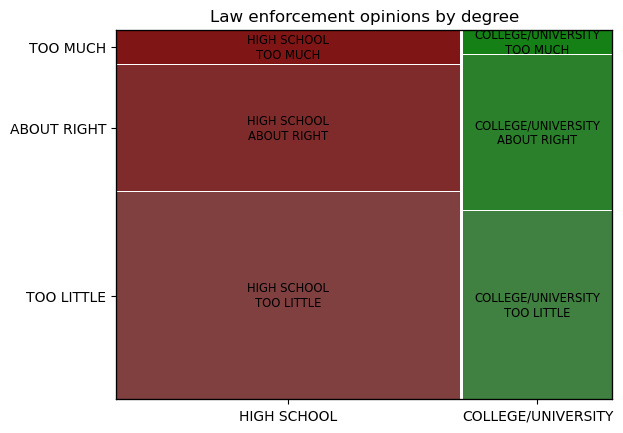

In [55]:
# Create a mosaic plot and show it
mosaic(df, 
       ['degree_clean', 'law_enforcement_clean'], 
       title='Law enforcement opinions by degree')

plt.show()

### Line charts
The final plot type we will cover is a line plot. Line plots often (but not always!) show the relationship between time and a numerical variable. Adding in a categorical variable can be a great way to enrich a line plot and provide other information.

Here, we use the `.value_counts()` method as an aggregation function, and use this in combination with a Plotly [`line_plot()`](https://plotly.com/python/line-charts/) to visualize the trend in marital statuses over the years.

In [56]:
# Group the dataframe by year and marital status, and calculate the normalized value counts
marital_rates = df.groupby(["year"], as_index=False)["marital_status"].value_counts(normalize=True)

# Display the resulting DataFrame
marital_rates

,year,marital_status,proportion
0,1972.0,MARRIED,0.722071
1,1972.0,NEVER MARRIED,0.131471
2,1972.0,WIDOWED,0.084469
3,1972.0,DIVORCED,0.039510
4,1972.0,SEPARATED,0.022480
...,...,...,...
145,2014.0,MARRIED,0.461250
146,2014.0,NEVER MARRIED,0.262500
147,2014.0,DIVORCED,0.165000
148,2014.0,WIDOWED,0.079167


In [57]:
# Create a new figure object
fig = px.line(marital_rates,
              x="year",
              y="proportion",
              color="marital_status",
              template="plotly_white",
              title="Marital status over time"
             )

# Update the y-axis to show percentages
fig.update_yaxes(tickformat=".0%")

# Show the plot
fig.show()